In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [95]:
df = pd.read_csv('/Users/yuchenzhang/Desktop/MBAN 6110/Assignment 1/sales_data (1).csv')

In [96]:
df.head()

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [98]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


## Data cleaning

In [99]:
null = df[df['Product'].isnull() & df['Region'].isnull()]
null

,Product,Region,Price,Units Sold,Sale Date
7,NaN,NaN,NaN,11.0,2022-01-08
22,NaN,NaN,36.26,NaN,2022-01-23
43,NaN,NaN,13.59,12.0,2022-02-13
228,NaN,NaN,24.35,10.0,2022-08-17
304,NaN,NaN,9.43,7.0,2022-11-01
318,NaN,NaN,305.21,9.0,2022-11-15
362,NaN,NaN,292.85,9.0,2022-12-29
604,NaN,NaN,49.04,13.0,2023-08-28
706,NaN,NaN,184.50,6.0,2023-12-08
842,NaN,NaN,200.61,12.0,2024-04-22


In [100]:
df.drop(null.index, inplace=True)

In [101]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,934.000000,932.000000,1038
unique,50,10,NaN,NaN,990
top,Product_4,Region_5,NaN,NaN,2023-05-18
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.184336,10.202790,NaN
std,NaN,NaN,167.810334,3.258414,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.442500,8.000000,NaN
50%,NaN,NaN,64.620000,10.000000,NaN
75%,NaN,NaN,141.150000,12.000000,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       934 non-null    float64
 3   Units Sold  932 non-null    float64
 4   Sale Date   1038 non-null   object 
dtypes: float64(2), object(3)
memory usage: 48.7+ KB


In [103]:
df_test = df.copy()

In [104]:
# Obtain descriptive statistics by Region using groupby()
df_test.groupby('Region').describe()

Price                                                            
           count        mean         std   min      25%     50%       75%   
Region                                                                      
Region_1    78.0   97.792821   89.277140  2.91  40.7575  72.440  121.2150  \
Region_10   80.0  113.310500  120.292908  0.19  26.7425  67.900  151.6175   
Region_2    94.0  137.287340  283.069362  1.49  24.4725  66.960  158.7025   
Region_3    75.0   91.008400   89.612608  3.40  35.1000  58.370  121.1550   
Region_4    79.0   85.824051   94.673327  2.37  21.3050  47.340  119.8500   
Region_5   100.0  125.430300  263.248626  0.27  31.6175  75.195  141.4850   
Region_6    81.0   96.727037   98.491166  0.71  28.7300  55.410  125.5100   
Region_7    84.0  107.210119  211.396135  0.19  20.1225  58.865  123.8175   
Region_8    88.0  120.850909  158.015038  0.27  38.8225  81.585  145.4825   
Region_9    88.0   95.861477   98.457933  0.25  23.6950  66.375  134.7675   

                   Units Sold                                                
               max      count       mean       std  min   25%   50%    75%   
Region                                                                       
Region_1    469.65       82.0  10.329268  3.527860  2.0  8.00  10.5  13.00  \
Region_10   650.50       81.0   9.814815  3.369388  4.0  8.00  10.0  12.00   
Region_2   2636.90       92.0  10.413043  2.875253  5.0  8.75  10.0  12.00   
Region_3    485.84       78.0   9.807692  3.137779  4.0  8.00  10.0  11.75   
Region_4    489.40       79.0  10.227848  3.108918  2.0  8.00  10.0  12.00   
Region_5   2544.60      103.0   9.941748  3.333800  3.0  7.00  10.0  12.00   
Region_6    417.05       71.0  10.394366  2.983186  4.0  9.00  10.0  12.00   
Region_7   1793.90       85.0  10.894118  3.712987  3.0  8.00  11.0  13.00   
Region_8   1296.00       84.0  10.642857  3.364030  3.0  8.75  11.0  12.25   
Region_9    531.91       89.0   9.887640  2.994078  5.0  7.00  10.0  12.00   

                 
            max  
Region           
Region_1   21.0  
Region_10  19.0  
Region_2   17.0  
Region_3   18.0  
Region_4   16.0  
Region_5   18.0  
Region_6   18.0  
Region_7   22.0  
Region_8   20.0  
Region_9   18.0

In [105]:
df_test['Region'] = df_test['Region'].fillna('other')

In [106]:
df_test.groupby('Region').describe()

Price                                                            
           count        mean         std   min      25%     50%       75%   
Region                                                                      
Region_1    78.0   97.792821   89.277140  2.91  40.7575  72.440  121.2150  \
Region_10   80.0  113.310500  120.292908  0.19  26.7425  67.900  151.6175   
Region_2    94.0  137.287340  283.069362  1.49  24.4725  66.960  158.7025   
Region_3    75.0   91.008400   89.612608  3.40  35.1000  58.370  121.1550   
Region_4    79.0   85.824051   94.673327  2.37  21.3050  47.340  119.8500   
Region_5   100.0  125.430300  263.248626  0.27  31.6175  75.195  141.4850   
Region_6    81.0   96.727037   98.491166  0.71  28.7300  55.410  125.5100   
Region_7    84.0  107.210119  211.396135  0.19  20.1225  58.865  123.8175   
Region_8    88.0  120.850909  158.015038  0.27  38.8225  81.585  145.4825   
Region_9    88.0   95.861477   98.457933  0.25  23.6950  66.375  134.7675   
other       87.0  107.890690  117.639895  1.46  21.4350  56.250  162.3150   

                   Units Sold                                                
               max      count       mean       std  min   25%   50%    75%   
Region                                                                       
Region_1    469.65       82.0  10.329268  3.527860  2.0  8.00  10.5  13.00  \
Region_10   650.50       81.0   9.814815  3.369388  4.0  8.00  10.0  12.00   
Region_2   2636.90       92.0  10.413043  2.875253  5.0  8.75  10.0  12.00   
Region_3    485.84       78.0   9.807692  3.137779  4.0  8.00  10.0  11.75   
Region_4    489.40       79.0  10.227848  3.108918  2.0  8.00  10.0  12.00   
Region_5   2544.60      103.0   9.941748  3.333800  3.0  7.00  10.0  12.00   
Region_6    417.05       71.0  10.394366  2.983186  4.0  9.00  10.0  12.00   
Region_7   1793.90       85.0  10.894118  3.712987  3.0  8.00  11.0  13.00   
Region_8   1296.00       84.0  10.642857  3.364030  3.0  8.75  11.0  12.25   
Region_9    531.91       89.0   9.887640  2.994078  5.0  7.00  10.0  12.00   
other       570.60       88.0   9.931818  3.303761  3.0  7.00  10.0  12.00   

                 
            max  
Region           
Region_1   21.0  
Region_10  19.0  
Region_2   17.0  
Region_3   18.0  
Region_4   16.0  
Region_5   18.0  
Region_6   18.0  
Region_7   22.0  
Region_8   20.0  
Region_9   18.0  
other      19.0

The data in the other Region looks pretty muck like other region. Therefore, if we are using the other as a region, this won't creating mmuch bias. 

In [107]:
df_test_2 = df.copy()

In [108]:
df_test_2['Region'] = df_test_2['Region'].fillna('Region_5')

In [109]:
df_test_2.groupby('Region').describe()

Price                                                            
           count        mean         std   min      25%     50%       75%   
Region                                                                      
Region_1    78.0   97.792821   89.277140  2.91  40.7575  72.440  121.2150  \
Region_10   80.0  113.310500  120.292908  0.19  26.7425  67.900  151.6175   
Region_2    94.0  137.287340  283.069362  1.49  24.4725  66.960  158.7025   
Region_3    75.0   91.008400   89.612608  3.40  35.1000  58.370  121.1550   
Region_4    79.0   85.824051   94.673327  2.37  21.3050  47.340  119.8500   
Region_5   187.0  117.270160  208.233263  0.27  26.8850  68.150  151.5300   
Region_6    81.0   96.727037   98.491166  0.71  28.7300  55.410  125.5100   
Region_7    84.0  107.210119  211.396135  0.19  20.1225  58.865  123.8175   
Region_8    88.0  120.850909  158.015038  0.27  38.8225  81.585  145.4825   
Region_9    88.0   95.861477   98.457933  0.25  23.6950  66.375  134.7675   

                   Units Sold                                                
               max      count       mean       std  min   25%   50%    75%   
Region                                                                       
Region_1    469.65       82.0  10.329268  3.527860  2.0  8.00  10.5  13.00  \
Region_10   650.50       81.0   9.814815  3.369388  4.0  8.00  10.0  12.00   
Region_2   2636.90       92.0  10.413043  2.875253  5.0  8.75  10.0  12.00   
Region_3    485.84       78.0   9.807692  3.137779  4.0  8.00  10.0  11.75   
Region_4    489.40       79.0  10.227848  3.108918  2.0  8.00  10.0  12.00   
Region_5   2544.60      191.0   9.937173  3.311262  3.0  7.00  10.0  12.00   
Region_6    417.05       71.0  10.394366  2.983186  4.0  9.00  10.0  12.00   
Region_7   1793.90       85.0  10.894118  3.712987  3.0  8.00  11.0  13.00   
Region_8   1296.00       84.0  10.642857  3.364030  3.0  8.75  11.0  12.25   
Region_9    531.91       89.0   9.887640  2.994078  5.0  7.00  10.0  12.00   

                 
            max  
Region           
Region_1   21.0  
Region_10  19.0  
Region_2   17.0  
Region_3   18.0  
Region_4   16.0  
Region_5   19.0  
Region_6   18.0  
Region_7   22.0  
Region_8   20.0  
Region_9   18.0

We can see the the region_5 has changed a lot. The sales increas from  100 to 187. The mean decrease from 125 to 117. 

Based on those findings. It is better to create the other region.

In [110]:
df['Region'] = df['Region'].fillna('Other')

Let's do the same step for the Product.

In [111]:
df_test['Product'] = df_test['Product'].fillna('Other')
df_test_2['Product'] = df_test_2['Product'].fillna('Product_4')

In [112]:
df_test.groupby('Product').describe()

Price                                                              
           count        mean         std    min      25%      50%       75%   
Product                                                                       
Other       81.0  132.646790  293.502959   0.27  17.9000   64.600  147.4700  \
Product_1   19.0   99.960526  108.592682   3.40  46.8550   75.880  107.4200   
Product_10  17.0   97.610588   77.320574   3.63  36.2400   85.330  121.6500   
Product_11  12.0  120.550833   98.670114  21.70  61.6225   78.720  142.3325   
Product_12  14.0   77.138571   65.900566   2.37  30.6700   62.570  108.5425   
Product_13  17.0   88.629412   85.923571  12.86  18.2100   54.910  145.8400   
Product_14  10.0   95.544000  140.334625   4.15  17.6350   40.905  102.9875   
Product_15  19.0   89.121053  102.348294   5.71  24.2300   39.720  140.4600   
Product_16  13.0   77.116154  104.202676   4.52  11.2800   46.950   91.9800   
Product_17  21.0  127.157143   88.934104   5.39  54.6500  120.080  180.6100   
Product_18  11.0  107.107273  117.847272   1.90  18.7450   97.780  139.1000   
Product_19  20.0  115.748500   82.634176  16.82  46.6175   96.925  158.4750   
Product_2   17.0   79.284706   98.867995   8.80  24.8000   41.140   96.0300   
Product_20  15.0  110.592000  124.964054   9.09  21.6200   39.860  171.7950   
Product_21  14.0  110.399286  133.127824   0.19  16.6725   67.730  138.1200   
Product_22  18.0  130.213889  125.527139   7.59  48.8050   74.380  179.3050   
Product_23  20.0  130.509000  104.763169  11.00  35.3175   95.435  202.5500   
Product_24  25.0   57.740000   49.101278   0.25  26.3100   46.870   63.8700   
Product_25  13.0   79.464615   83.116307   1.96  10.2000   56.250  100.5700   
Product_26  16.0   90.234375   98.076628   8.76  31.7475   49.835  137.0575   
Product_27  21.0  193.255238  391.650662   1.96  24.0900   59.150  160.3400   
Product_28  20.0   78.497500   80.023828   4.20  22.1250   46.810  110.6975   
Product_29  14.0   82.186429   58.486838  10.39  33.4250   65.570  117.2300   
Product_3   21.0   93.558095   98.864401   7.57  20.8100   42.790  113.4700   
Product_30  15.0   85.231333   99.109780   3.61  27.0900   52.600   88.0400   
Product_31  20.0  128.834500  111.157886   1.60  25.1600   81.490  247.0900   
Product_32  10.0   74.437000   69.775829   1.66  26.4850   50.895  120.5650   
Product_33  16.0  114.543125  108.220983   7.97  45.6575   69.925  129.0250   
Product_34  17.0  253.598235  618.111915  20.51  53.7500  124.300  165.0900   
Product_35  11.0   47.802727   20.363126  17.20  34.9750   47.160   61.4100   
Product_36  18.0  103.420556   95.675373   0.27  26.7350   93.855  141.7100   
Product_37  17.0  105.664706  125.155765   4.31  23.3500   39.440  145.1000   
Product_38  19.0  100.138947   65.591971   7.46  44.8300   86.840  135.0000   
Product_39  12.0  104.623333  102.858955   1.46  11.5225   70.400  224.4300   
Product_4   29.0   99.022414   85.759042   6.02  24.5200   74.250  147.7800   
Product_40  26.0  111.934615  140.208123   2.91  27.3675   48.795  120.8150   
Product_41  11.0   70.522727   59.472020  13.16  20.7550   60.560  101.2550   
Product_42  19.0   90.431579   74.030503  17.44  28.7150   75.390  135.2600   
Product_43  25.0   73.047600   63.950752   0.27  27.3800   61.050   91.8200   
Product_44  15.0  120.669333  137.578457   0.19  28.2650   83.330  116.2700   
Product_45  14.0  104.425714   88.948415   6.20  34.5400   86.365  152.4725   
Product_46  15.0  120.521333  125.516603   0.71  38.9150   87.660  133.6500   
Product_47  10.0   68.001000   44.358792  13.46  33.5250   59.535  112.5975   
Product_48  14.0   66.525714   67.226234   6.22  23.1050   51.840   73.0550   
Product_49  21.0  165.538095  268.610528  14.87  51.9300   96.060  168.3600   
Product_5   13.0   77.390000   69.412601   2.06  18.8000   49.530  150.8700   
Product_50  25.0  179.963600  156.803329  19.74  68.1600  144.470  223.8100   
Product_6   16.0   90.030000   89.634786  22.76  28.8200   63

In [113]:
df_test_2.groupby('Product').describe()

Price                                                              
            count        mean         std    min      25%      50%       75%   
Product                                                                        
Product_1    19.0   99.960526  108.592682   3.40  46.8550   75.880  107.4200  \
Product_10   17.0   97.610588   77.320574   3.63  36.2400   85.330  121.6500   
Product_11   12.0  120.550833   98.670114  21.70  61.6225   78.720  142.3325   
Product_12   14.0   77.138571   65.900566   2.37  30.6700   62.570  108.5425   
Product_13   17.0   88.629412   85.923571  12.86  18.2100   54.910  145.8400   
Product_14   10.0   95.544000  140.334625   4.15  17.6350   40.905  102.9875   
Product_15   19.0   89.121053  102.348294   5.71  24.2300   39.720  140.4600   
Product_16   13.0   77.116154  104.202676   4.52  11.2800   46.950   91.9800   
Product_17   21.0  127.157143   88.934104   5.39  54.6500  120.080  180.6100   
Product_18   11.0  107.107273  117.847272   1.90  18.7450   97.780  139.1000   
Product_19   20.0  115.748500   82.634176  16.82  46.6175   96.925  158.4750   
Product_2    17.0   79.284706   98.867995   8.80  24.8000   41.140   96.0300   
Product_20   15.0  110.592000  124.964054   9.09  21.6200   39.860  171.7950   
Product_21   14.0  110.399286  133.127824   0.19  16.6725   67.730  138.1200   
Product_22   18.0  130.213889  125.527139   7.59  48.8050   74.380  179.3050   
Product_23   20.0  130.509000  104.763169  11.00  35.3175   95.435  202.5500   
Product_24   25.0   57.740000   49.101278   0.25  26.3100   46.870   63.8700   
Product_25   13.0   79.464615   83.116307   1.96  10.2000   56.250  100.5700   
Product_26   16.0   90.234375   98.076628   8.76  31.7475   49.835  137.0575   
Product_27   21.0  193.255238  391.650662   1.96  24.0900   59.150  160.3400   
Product_28   20.0   78.497500   80.023828   4.20  22.1250   46.810  110.6975   
Product_29   14.0   82.186429   58.486838  10.39  33.4250   65.570  117.2300   
Product_3    21.0   93.558095   98.864401   7.57  20.8100   42.790  113.4700   
Product_30   15.0   85.231333   99.109780   3.61  27.0900   52.600   88.0400   
Product_31   20.0  128.834500  111.157886   1.60  25.1600   81.490  247.0900   
Product_32   10.0   74.437000   69.775829   1.66  26.4850   50.895  120.5650   
Product_33   16.0  114.543125  108.220983   7.97  45.6575   69.925  129.0250   
Product_34   17.0  253.598235  618.111915  20.51  53.7500  124.300  165.0900   
Product_35   11.0   47.802727   20.363126  17.20  34.9750   47.160   61.4100   
Product_36   18.0  103.420556   95.675373   0.27  26.7350   93.855  141.7100   
Product_37   17.0  105.664706  125.155765   4.31  23.3500   39.440  145.1000   
Product_38   19.0  100.138947   65.591971   7.46  44.8300   86.840  135.0000   
Product_39   12.0  104.623333  102.858955   1.46  11.5225   70.400  224.4300   
Product_4   110.0  123.782182  255.608494   0.27  21.6225   65.410  147.7025   
Product_40   26.0  111.934615  140.208123   2.91  27.3675   48.795  120.8150   
Product_41   11.0   70.522727   59.472020  13.16  20.7550   60.560  101.2550   
Product_42   19.0   90.431579   74.030503  17.44  28.7150   75.390  135.2600   
Product_43   25.0   73.047600   63.950752   0.27  27.3800   61.050   91.8200   
Product_44   15.0  120.669333  137.578457   0.19  28.2650   83.330  116.2700   
Product_45   14.0  104.425714   88.948415   6.20  34.5400   86.365  152.4725   
Product_46   15.0  120.521333  125.516603   0.71  38.9150   87.660  133.6500   
Product_47   10.0   68.001000   44.358792  13.46  33.5250   59.535  112.5975   
Product_48   14.0   66.525714   67.226234   6.22  23.1050   51.840   73.0550   
Product_49   21.0  165.538095  268.610528  14.87  51.9300   96.060  168.3600   
Product_5    13.0   77.390000   69.412601   2.06  18.8000   49.530  150.8700   
Product_50   25.0  179.963600  156.803329  19.74  68.1600  144.470  223.8100   
Product_6    16.0   90.030000   89.634786  22.76  28.8200   63.025  107.4125   
Product_7   

In [114]:
df_test_2.groupby('Product').describe().loc['Product_4']

Price       count     110.000000
            mean      123.782182
            std       255.608494
            min         0.270000
            25%        21.622500
            50%        65.410000
            75%       147.702500
            max      2544.600000
Units Sold  count     107.000000
            mean        9.859813
            std         3.166596
            min         4.000000
            25%         8.000000
            50%        10.000000
            75%        11.000000
            max        22.000000
Name: Product_4, dtype: float64

In [115]:
df.groupby('Product').describe().loc['Product_4']

Price       count     29.000000
            mean      99.022414
            std       85.759042
            min        6.020000
            25%       24.520000
            50%       74.250000
            75%      147.780000
            max      340.590000
Units Sold  count     25.000000
            mean       9.480000
            std        4.052982
            min        4.000000
            25%        7.000000
            50%        9.000000
            75%       10.000000
            max       22.000000
Name: Product_4, dtype: float64

Neither methods good here. let's fill in with the random products value. 

In [116]:
df_test_3 = df.copy()

In [117]:
# Create a list of all product names
product_list = df['Product'].unique()
product_list

array([nan, 'Product_40', 'Product_1', 'Product_6', 'Product_44',
       'Product_21', 'Product_31', 'Product_20', 'Product_34',
       'Product_3', 'Product_35', 'Product_50', 'Product_4', 'Product_19',
       'Product_23', 'Product_13', 'Product_9', 'Product_48',
       'Product_26', 'Product_42', 'Product_14', 'Product_5',
       'Product_37', 'Product_12', 'Product_8', 'Product_39',
       'Product_17', 'Product_29', 'Product_47', 'Product_36',
       'Product_43', 'Product_16', 'Product_32', 'Product_10',
       'Product_15', 'Product_27', 'Product_22', 'Product_28',
       'Product_45', 'Product_25', 'Product_11', 'Product_46',
       'Product_2', 'Product_33', 'Product_49', 'Product_24',
       'Product_41', 'Product_18', 'Product_7', 'Product_30',
       'Product_38'], dtype=object)

In [118]:
# Remove nan from list
product_list = product_list[1:]

In [119]:
miss_data = df_test_3['Product'].isnull().sum()

In [120]:
random_products = np.random.choice(product_list, size=miss_data)

In [121]:
df_test_3.loc[df_test_3['Product'].isnull(), 'Product'] = random_products

In [122]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1038 non-null   object 
 1   Region      1038 non-null   object 
 2   Price       934 non-null    float64
 3   Units Sold  932 non-null    float64
 4   Sale Date   1038 non-null   object 
dtypes: float64(2), object(3)
memory usage: 48.7+ KB


In [123]:
df.dropna(subset=['Product'], axis=0, inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 1 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      947 non-null    object 
 2   Price       853 non-null    float64
 3   Units Sold  850 non-null    float64
 4   Sale Date   947 non-null    object 
dtypes: float64(2), object(3)
memory usage: 44.4+ KB


In [125]:
df_test = df.copy()
df_test_2 = df.copy()
df_test_3 = df.copy()

In [126]:
df_test['Price'] = df_test['Price'].fillna(df['Price'].median())

In [127]:
df_test_2['Price'] = df_test_2['Price'].fillna(df_test_2.groupby('Product')['Price'].transform('median'))

In [128]:
df_test_3['Price'] = df_test_3['Price'].fillna(df_test_3.groupby('Region')['Price'].transform('median'))

In [129]:
df_test.describe()

,Price,Units Sold
count,947.000000,850.000000
mean,101.769736,10.224706
std,143.472656,3.294726
min,0.190000,2.000000
25%,30.615000,8.000000
50%,64.640000,10.000000
75%,127.950000,13.000000
max,2636.900000,22.000000


In [130]:
df_test_2.describe()

,Price,Units Sold
count,947.000000,850.000000
mean,101.978501,10.224706
std,143.583608,3.294726
min,0.190000,2.000000
25%,30.615000,8.000000
50%,62.990000,10.000000
75%,127.950000,13.000000
max,2636.900000,22.000000


In [131]:
df_test_3.describe()

,Price,Units Sold
count,947.000000,850.000000
mean,101.598738,10.224706
std,143.571631,3.294726
min,0.190000,2.000000
25%,30.615000,8.000000
50%,64.270000,10.000000
75%,127.950000,13.000000
max,2636.900000,22.000000


In [132]:
df.describe()

,Price,Units Sold
count,853.000000,850.000000
mean,105.861407,10.224706
std,150.620681,3.294726
min,0.190000,2.000000
25%,27.100000,8.000000
50%,64.640000,10.000000
75%,140.000000,13.000000
max,2636.900000,22.000000


In [133]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [137]:
df_test = df.copy()
df_test_2 = df.copy()
df_test_3 = df.copy()

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 1 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      947 non-null    object 
 2   Price       947 non-null    float64
 3   Units Sold  850 non-null    float64
 4   Sale Date   947 non-null    object 
dtypes: float64(2), object(3)
memory usage: 44.4+ KB


In [138]:
df_test['Units Sold'] = df_test['Units Sold'].fillna(df_test['Units Sold'].median())
df_test_2['Units Sold'] = df_test_2['Units Sold'].fillna(df_test_2.groupby('Region')['Units Sold'].transform('median'))
df_test_3['Units Sold'] = df_test_3['Units Sold'].fillna(df_test_3.groupby('Product')['Units Sold'].transform('median'))

In [139]:
df_test.describe()

,Price,Units Sold
count,947.000000,947.000000
mean,105.861407,10.201690
std,142.941665,3.121987
min,0.190000,2.000000
25%,30.615000,8.000000
50%,79.240000,10.000000
75%,127.950000,12.000000
max,2636.900000,22.000000


In [140]:
df_test_2.describe()

,Price,Units Sold
count,947.000000,947.000000
mean,105.861407,10.228089
std,142.941665,3.124400
min,0.190000,2.000000
25%,30.615000,8.000000
50%,79.240000,10.000000
75%,127.950000,12.000000
max,2636.900000,22.000000


In [141]:
df_test_3.describe()

,Price,Units Sold
count,947.000000,947.000000
mean,105.861407,10.196410
std,142.941665,3.139206
min,0.190000,2.000000
25%,30.615000,8.000000
50%,79.240000,10.000000
75%,127.950000,12.000000
max,2636.900000,22.000000


In [142]:
df.describe()

,Price,Units Sold
count,947.000000,850.000000
mean,105.861407,10.224706
std,142.941665,3.294726
min,0.190000,2.000000
25%,30.615000,8.000000
50%,79.240000,10.000000
75%,127.950000,13.000000
max,2636.900000,22.000000


In [143]:
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].median())

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 1 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      947 non-null    object 
 2   Price       947 non-null    float64
 3   Units Sold  947 non-null    float64
 4   Sale Date   947 non-null    object 
dtypes: float64(2), object(3)
memory usage: 44.4+ KB


In [145]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,947,947.000000,947.000000,947
unique,50,11,NaN,NaN,900
top,Product_4,Region_5,NaN,NaN,2022-01-02
freq,30,100,NaN,NaN,2
mean,NaN,NaN,105.861407,10.201690,NaN
std,NaN,NaN,142.941665,3.121987,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,30.615000,8.000000,NaN
50%,NaN,NaN,79.240000,10.000000,NaN
75%,NaN,NaN,127.950000,12.000000,NaN


In [147]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [148]:
df.head()

,Product,Region,Price,Units Sold,Sale Date
1,Product_40,Region_2,46.190000,10.0,2022-01-02
2,Product_1,Region_5,105.861407,4.0,2022-01-03
3,Product_6,Region_8,143.470000,8.0,2022-01-04
4,Product_44,Region_4,122.540000,10.0,2022-01-05
5,Product_21,Region_8,15.760000,20.0,2022-01-06


<Axes: ylabel='Price'>

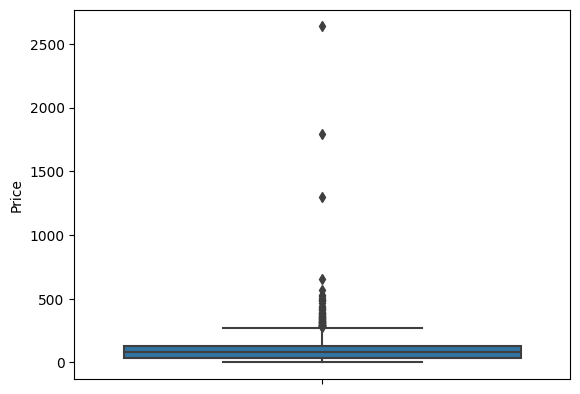

In [149]:
sns.boxplot(y='Price', data=df)

,Product,Region,Price,Units Sold,Sale Date
269,Product_49,Region_8,1296.0,14.0,2022-09-27
407,Product_27,Region_7,1793.9,9.0,2023-02-12
421,Product_34,Region_2,2636.9,14.0,2023-02-26


In [154]:
drop_outliers = df[df['Price'] > 1000].index
drop_outliers

Index([269, 407, 421], dtype='int64')

In [155]:
df.drop(drop_outliers, inplace=True)

<Axes: ylabel='Units Sold'>

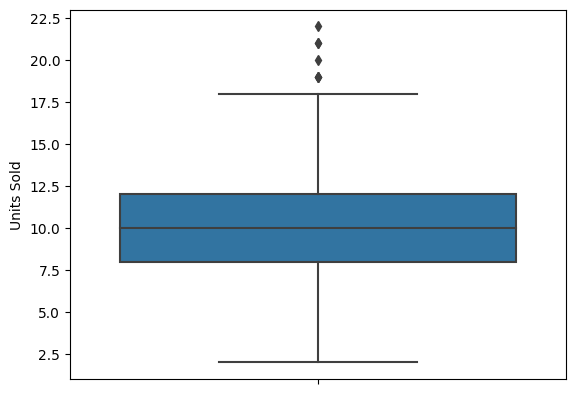

In [156]:
sns.boxplot(y='Units Sold', data=df)

In [158]:
df['Units Sold'].sort_values(ascending=False).head(10)

559    22.0
712    21.0
436    21.0
5      20.0
97     19.0
841    19.0
939    19.0
703    18.0
350    18.0
487    18.0
Name: Units Sold, dtype: float64

In [162]:
drop_units_outlier = df[df['Units Sold'] >= 19].index
drop_units_outlier

Index([5, 97, 436, 559, 712, 841, 939], dtype='int64')

In [163]:
df.drop(drop_units_outlier, inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 1 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     937 non-null    object        
 1   Region      937 non-null    object        
 2   Price       937 non-null    float64       
 3   Units Sold  937 non-null    float64       
 4   Sale Date   937 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 43.9+ KB


Finally, let's drop some duplicates 

In [167]:
df.drop_duplicates(inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 1 to 998
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     890 non-null    object        
 1   Region      890 non-null    object        
 2   Price       890 non-null    float64       
 3   Units Sold  890 non-null    float64       
 4   Sale Date   890 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 41.7+ KB


We are now finished the data cleaning steps! Our final DataFrame has 890 entries we can use for analysis. To summarize how we approached cleaning the data:
* We dropped rows that had multiple missing values, which would cause challenges for imputation
* We reviewed missing values in detail, and compared various approaches to imputing data. For the Region, we assessed whether we should impute with "Other" or the mode - since the mode resulted in value changes, we decided to go with "Other"
* For the Product, we compared the approach of "Other", the mode, or imputing with random product assignments. Neither approach was great, and since we had only 10% of missing data points we decided that as long as we fill in missing Price and Units Sold data, we can drop the missing data from this column
* For Price, we compared imputation by the column median, median by Product, or median by Region. Option 1 and 3 yielded the same results, and Option 2 created bias - as such, we decided to use the column median
* For Units Sold, we compared imputation by the column median, median by Product, or median by Region. All 3 options yielded similar results, so for simplicity we used the column median
* We changed the data type of the Sale Date column to datetime (this was an optional step for this assignment)
* We used a boxplot to identify outliers in the Price and Units Sold column, and removed outliers
* We dropped all duplicate entries

Now, let's move on to Data Exploration.

### Data Exploration

The purpose of the data exploration stage is to identify trends and patterns in data. First, we should explore each variable by itself, and then we should explore variables in pairs or combinations. Our objective for the Data Exploration stage is to identify clear patterns or recommendations we can make to the business.

Let's start with univariate analysis. 

For the continuous variables (Price and Units Sold), we can use histograms to understand spread. For categorical variables, we can use counts and bar charts to see which groups are most popular.


<Axes: xlabel='Price', ylabel='Count'>

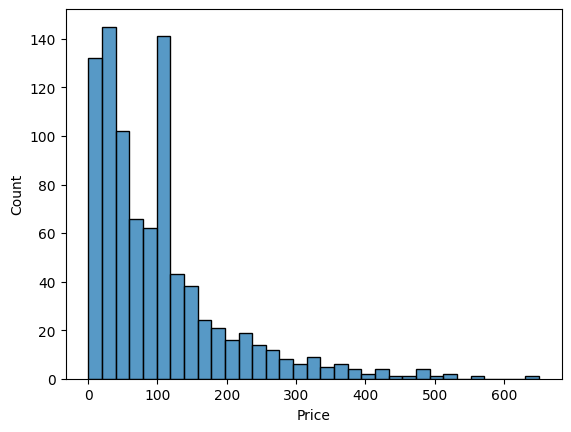

In [169]:
sns.histplot(df['Price'])

In [171]:
print(stats.skew(df['Price']))

1.8934714400336454


<Axes: xlabel='Units Sold', ylabel='Count'>

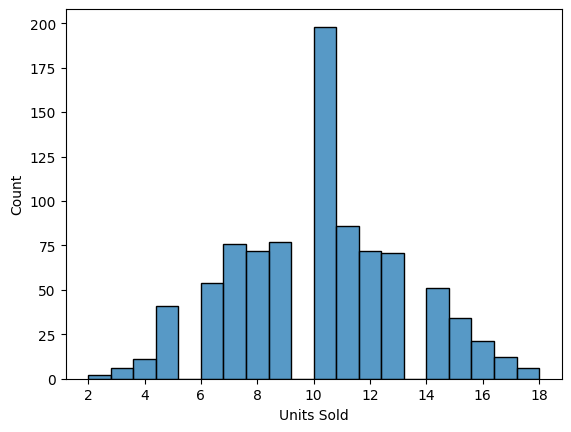

In [172]:
sns.histplot(df['Units Sold'])

In [173]:
print(stats.skew(df['Units Sold']))
print(stats.kurtosis(df['Units Sold']))

0.11525978515777988
-0.26841055861702046


Here we can see that the price has a right skew. This means that most products are lower-priced, with some products erring on the more expensive side. We can print out the Skew metric to validate what we're seeing. The skew for Price is equal to 1.94 indicating a right skew. 

the Units Sold distribution seems fairly normal, with most products selling around 10 units per transaction. The skew for Units Sold is 0.09, which is fairly close to 0 and supports what we see (normal distribution). We can also calculate kurtosis since the distribution is normal. The kurtosis of Units Sold is -0.27, which indicates a slightly Platykurtic distribution (thin tails), or less volatility.

Now let's check our categorical variables. We will look at counts to see how the data is distributed - we can use groupby() to group by the categorical variable, pick any random column to count the number of entries related to that column, aggregate with count(), sort using sort_values() and use plot() to create a bar chart. I'm adding a figsize parameter which allows me to make the figure a bit bigger and easier to see.